# Redes Neuronales Artificiales con Validación Cruzada

### Docente: M.Sc. Richard Fernández

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('D:/Bases/Kaggle/Banco/bank_deposit.csv')

In [3]:
data.head(8)

,idcliente,duration,previous,housing,campaign,loan,default,target,muestra
0,1,261,0,1,1,0,0,0,1
1,2,50,0,1,1,0,0,0,1
2,3,1492,0,1,1,0,0,0,1
3,4,104,0,1,1,0,0,0,1
4,5,13,0,1,1,0,0,0,1
5,6,172,0,1,1,1,0,0,1
6,7,583,0,1,1,0,0,0,1
7,8,426,0,1,1,1,0,0,1


In [4]:
data.dtypes

idcliente    int64
duration     int64
previous     int64
housing      int64
campaign     int64
loan         int64
default      int64
target       int64
muestra      int64
dtype: object

In [5]:
data['housing'] = data['housing'].astype(object)
data['loan'] = data['loan'].astype(object)
data['default'] = data['default'].astype(object)

In [6]:
data.dtypes

idcliente     int64
duration      int64
previous      int64
housing      object
campaign      int64
loan         object
default      object
target        int64
muestra       int64
dtype: object

In [7]:
data['c_housing'] = LabelEncoder().fit_transform(data.housing.values)
data['c_loan'] = LabelEncoder().fit_transform(data.loan.values)
data['c_default'] = LabelEncoder().fit_transform(data.default.values)

In [8]:
data.head(5)

,idcliente,duration,previous,housing,campaign,loan,default,target,muestra,c_housing,c_loan,c_default
0,1,261,0,1,1,0,0,0,1,1,0,0
1,2,50,0,1,1,0,0,0,1,1,0,0
2,3,1492,0,1,1,0,0,0,1,1,0,0
3,4,104,0,1,1,0,0,0,1,1,0,0
4,5,13,0,1,1,0,0,0,1,1,0,0


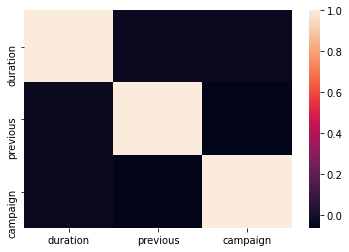

In [9]:
#Heatmap
sns.heatmap(data.loc[:,['duration','previous','campaign']].corr())
plt.show()

In [10]:
#Prueba de normalidad
#Ho: la variable se aproxima a una distribución normal
#Ha: la variable no se aproxima a una distribución normal

In [11]:
ss.shapiro(data.duration)

C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.805237889289856, pvalue=0.0)

In [12]:
ss.shapiro(data.previous)

ShapiroResult(statistic=0.40508270263671875, pvalue=0.0)

In [13]:
ss.shapiro(data.campaign)

ShapiroResult(statistic=0.5598044395446777, pvalue=0.0)

In [14]:
#Prueba de Correlación
#Ho: no existe correlación entre las variables
#Ha: existe correlación entre las variables

In [15]:
ss.spearmanr(data['duration'],data['previous'])

SpearmanrResult(correlation=0.007391554527368723, pvalue=0.44717238462569875)

In [16]:
ss.spearmanr(data['duration'],data['campaign'])

SpearmanrResult(correlation=-0.04511102781446181, pvalue=3.4596132567098772e-06)

In [17]:
ss.spearmanr(data['previous'],data['campaign'])

SpearmanrResult(correlation=-0.13337989612024528, pvalue=3.456139168446694e-43)

In [18]:
data.loc[:,['duration','previous','campaign']].corr(method = "spearman")

,duration,previous,campaign
duration,1.000000,0.007392,-0.045111
previous,0.007392,1.000000,-0.133380
campaign,-0.045111,-0.133380,1.000000


In [19]:
data['target'].dtype

dtype('int64')

In [20]:
data['target'] = data['target'].astype('int64')

In [21]:
data['target'].dtype

dtype('int64')

In [22]:
data.target.value_counts()

0    5289
1    5289
Name: target, dtype: int64

In [23]:
100*data['target'].value_counts(normalize=True)

0    50.0
1    50.0
Name: target, dtype: float64

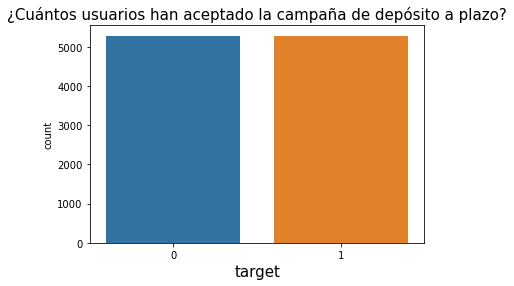

In [24]:
sns.countplot(data = data, x = 'target')
plt.xlabel('target', fontsize = 15)
plt.title('¿Cuántos usuarios han aceptado la campaña de depósito a plazo?', fontsize = 15)
plt.show()

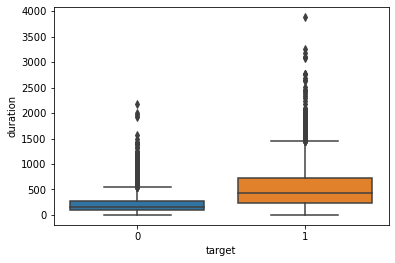

In [25]:
sns.boxplot(x='target',y='duration',data=data)
plt.show()

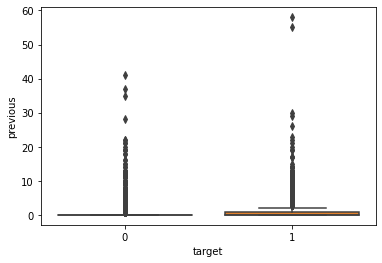

In [26]:
sns.boxplot(x='target',y='previous',data=data)
plt.show()

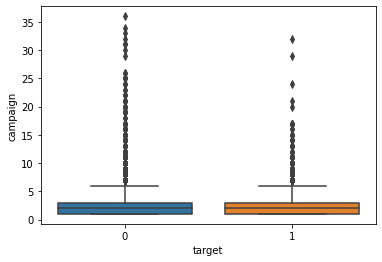

In [27]:
sns.boxplot(x='target',y='campaign',data=data)
plt.show()

housing     0     1
target             
0        2176  3113
1        3354  1935


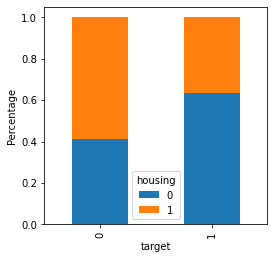

In [28]:
print(pd.crosstab(data["target"],data["housing"]))
t = pd.crosstab(data["target"],data["housing"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("target")
plt.ylabel("Percentage")
plt.show()

loan       0    1
target           
0       4359  930
1       4805  484


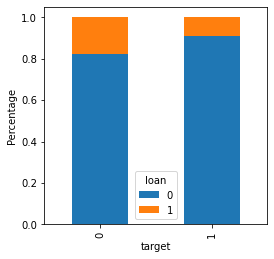

In [29]:
print(pd.crosstab(data["target"],data["loan"]))
t = pd.crosstab(data["target"],data["loan"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("target")
plt.ylabel("Percentage")
plt.show()

default     0   1
target           
0        5202  87
1        5237  52


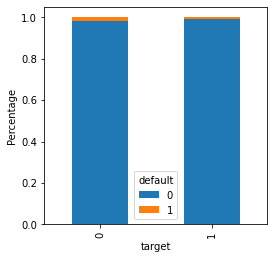

In [30]:
print(pd.crosstab(data["target"],data["default"]))
t = pd.crosstab(data["target"],data["default"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("target")
plt.ylabel("Percentage")
plt.show()

In [31]:
#Prueba Chi-Cuadrado
#Ho: no existe dependencia entre las variables
#Ha: existe dependencia entre las variables

In [32]:
contigencia = pd.crosstab(data['target'], data['housing']) 
c, p, dof, expected = chi2_contingency(contigencia) 
print(p)

3.557728213453099e-116


In [33]:
contigencia = pd.crosstab(data['target'], data['loan']) 
c, p, dof, expected = chi2_contingency(contigencia) 
print(p)

4.921141785848781e-37


In [34]:
contigencia = pd.crosstab(data['target'], data['default']) 
c, p, dof, expected = chi2_contingency(contigencia) 
print(p)

0.0036963177458966233


In [35]:
X = data[['c_housing','c_loan','c_default','duration','previous','campaign']]
y = data['target']

In [36]:
X = X.to_numpy()

In [37]:
X[0:5]

array([[   1,    0,    0,  261,    0,    1],
       [   1,    0,    0,   50,    0,    1],
       [   1,    0,    0, 1492,    0,    1],
       [   1,    0,    0,  104,    0,    1],
       [   1,    0,    0,   13,    0,    1]], dtype=int64)

In [38]:
y = y.to_numpy()

In [39]:
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [41]:
X_train[0:5]

array([[   1,    0,    1, 1080,    0,    1],
       [   1,    0,    0,  204,    0,    1],
       [   0,    0,    0,  140,    0,    9],
       [   0,    0,    0,  373,    0,    1],
       [   0,    0,    0,  194,    0,    2]], dtype=int64)

In [42]:
X_test[0:5]

array([[  0,   0,   0, 263,   1,   1],
       [  0,   0,   0, 597,   0,   1],
       [  0,   0,   0, 150,   0,   2],
       [  0,   0,   0, 917,   0,   1],
       [  1,   0,   0, 404,   3,   1]], dtype=int64)

In [43]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [44]:
X_train[0:5]

array([[ 1.05317258, -0.39338138,  8.48223295,  2.00876968, -0.36535588,
        -0.56494305],
       [ 1.05317258, -0.39338138, -0.11789348, -0.50165504, -0.36535588,
        -0.56494305],
       [-0.949512  , -0.39338138, -0.11789348, -0.68506507, -0.36535588,
         2.41870374],
       [-0.949512  , -0.39338138, -0.11789348, -0.01733795, -0.36535588,
        -0.56494305],
       [-0.949512  , -0.39338138, -0.11789348, -0.53031286, -0.36535588,
        -0.1919872 ]])

In [45]:
X_test[0:5]

array([[-0.97941782, -0.39051946, -0.10482848, -0.32766412,  0.0864961 ,
        -0.60853731],
       [-0.97941782, -0.39051946, -0.10482848,  0.63785382, -0.38889546,
        -0.60853731],
       [-0.97941782, -0.39051946, -0.10482848, -0.65432139, -0.38889546,
        -0.16846043],
       [-0.97941782, -0.39051946, -0.10482848,  1.56290095, -0.38889546,
        -0.60853731],
       [ 1.02101471, -0.39051946, -0.10482848,  0.07993477,  1.03727923,
        -0.60853731]])

In [48]:
#Redes Neuronales Artificiales

###hidden_layer_sizes : Establece el número de capas y el número de nodos.
#Cada elemento de la tupla representa el número
#de nodos en la i-ésima posición donde i es el índice de la tupla
#Por lo tanto, la longitud de la tupla denota el número total de capas ocultas en la red.

###activation: Fución de activiación para las capas ocultas.

###solver: Algoritmo para la optimización del peso en los nodos.

###alpha: Parámetro de penalización.

###learning_rate: se usa para la actualización de pesos.

###max_iter: Denota el número de épocas.

###random_state: Establece una semilla para reproducir los mismos resultados.

classifier = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=500, alpha=0.0001,
                     solver='adam', random_state=21,tol=0.000000001)

In [49]:
#Validación Cruzada
#cv_scores = cross_val_score(SVC(kernel='linear',probability=True),X_train,y_train,cv=5)

In [50]:
#Accuracy
#print(cv_scores)

[0.76845836 0.79208506 0.78073286 0.79787234 0.78250591]


In [51]:
#Accuracy Promedio
#print("cv_scores mean:{}".format(np.mean(cv_scores)))

cv_scores mean:0.7843309050337993


In [46]:
#Tuning
param_grid = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [47]:
grid = GridSearchCV(MLPClassifier(max_iter=500),param_grid,refit=True,verbose=2,cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   3.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   4.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   4.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   3.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd; total time=   3.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam; total time=   5.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam; total time=   5.6s
[CV] END activation=tanh, alpha=0.0001, 

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=2)

In [48]:
print(grid.best_estimator_)

MLPClassifier(alpha=0.05, hidden_layer_sizes=(10, 30, 10), max_iter=500)


In [52]:
#Redes Neuronales Artificiales
classifier = MLPClassifier(hidden_layer_sizes=(10,30,10),max_iter=500,alpha=0.05).fit(X_train, y_train)

In [53]:
y_pred = classifier.predict(X_test)

In [54]:
y_pred[0:20]

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

In [55]:
y_test[0:20]

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1],
      dtype=int64)

In [56]:
confusion_matrix(y_test, y_pred)

array([[794, 235],
       [185, 902]], dtype=int64)

Confusion matrix, without normalization
[[794 235]
 [185 902]]
Normalized confusion matrix
[[0.77162293 0.22837707]
 [0.17019319 0.82980681]]


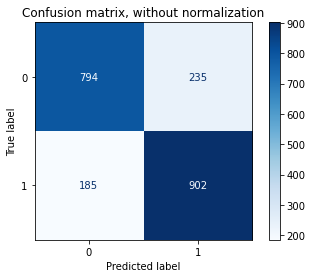

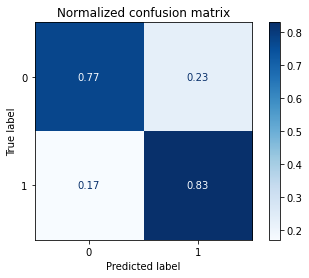

In [57]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [58]:
y_pred_prob = classifier.predict_proba(X_test)

In [59]:
y_pred_prob[0:5]

array([[0.0994729 , 0.9005271 ],
       [0.14457182, 0.85542818],
       [0.67789887, 0.32210113],
       [0.12422746, 0.87577254],
       [0.22714559, 0.77285441]])

In [60]:
y_pred_prob[0:5,1]

array([0.9005271 , 0.85542818, 0.32210113, 0.87577254, 0.77285441])

In [61]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [62]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8738273598307769

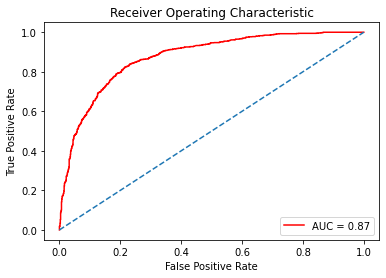

In [63]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1029
           1       0.79      0.83      0.81      1087

    accuracy                           0.80      2116
   macro avg       0.80      0.80      0.80      2116
weighted avg       0.80      0.80      0.80      2116



In [65]:
dataf = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)

In [66]:
dataf.head(5)

,0,1,2,3,4,5,0,0,0,1
0,-0.979418,-0.390519,-0.104828,-0.327664,0.086496,-0.608537,1,1,0.099473,0.900527
1,-0.979418,-0.390519,-0.104828,0.637854,-0.388895,-0.608537,1,1,0.144572,0.855428
2,-0.979418,-0.390519,-0.104828,-0.654321,-0.388895,-0.168460,0,0,0.677899,0.322101
3,-0.979418,-0.390519,-0.104828,1.562901,-0.388895,-0.608537,1,1,0.124227,0.875773
4,1.021015,-0.390519,-0.104828,0.079935,1.037279,-0.608537,1,1,0.227146,0.772854


In [67]:
dataf.columns = ['c_housing','c_loan','c_default','duration','previous','campaign','Target','Target_Pred','Target_Pred_Prob_0','Target_Pred_Prob_1']

In [68]:
dataf.head(5)

,c_housing,c_loan,c_default,duration,previous,campaign,Target,Target_Pred,Target_Pred_Prob_0,Target_Pred_Prob_1
0,-0.979418,-0.390519,-0.104828,-0.327664,0.086496,-0.608537,1,1,0.099473,0.900527
1,-0.979418,-0.390519,-0.104828,0.637854,-0.388895,-0.608537,1,1,0.144572,0.855428
2,-0.979418,-0.390519,-0.104828,-0.654321,-0.388895,-0.168460,0,0,0.677899,0.322101
3,-0.979418,-0.390519,-0.104828,1.562901,-0.388895,-0.608537,1,1,0.124227,0.875773
4,1.021015,-0.390519,-0.104828,0.079935,1.037279,-0.608537,1,1,0.227146,0.772854


In [69]:
quantiles = dataf['Target_Pred_Prob_1'].quantile(q=[0.20,0.40,0.60,0.80])
quantiles

0.2    0.113203
0.4    0.383661
0.6    0.679615
0.8    0.871394
Name: Target_Pred_Prob_1, dtype: float64

In [ ]:
dataf.to_csv('D:/dataf.csv', index = False)

In [ ]:
#Tarea
#1.Para la base de datos dataf, colocar los valores iniciales de las primeras 6 variables.
#2.Para la base de datos dataf, crear una variable "score", con las categorías: Muy alto, alto, medio, bajo y muy bajo. 
#Usar: Target_Pred_Prob_1